In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('telecom_churn.csv')

In [5]:
df.head(8)

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
5,6,Vodafone,M,36,Uttarakhand,Chennai,120612,2020-01-01,1,73452,91,24,8109,0
6,7,BSNL,F,60,Karnataka,Delhi,609616,2020-01-01,1,110035,36,13,8512,0
7,8,BSNL,M,46,Arunachal Pradesh,Kolkata,866786,2020-01-01,4,104541,87,40,2245,1


In [7]:
df.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

Converting neagtive value into positive

In [10]:
df['calls_made'] = df['calls_made'].abs()
df['sms_sent'] = df['sms_sent'].abs()
df['data_used'] = df['data_used'].apply(lambda x: 0 if x<0 else x)
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'], errors='coerce')

In [12]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,0,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


Univariate Analysis

<Axes: ylabel='count'>

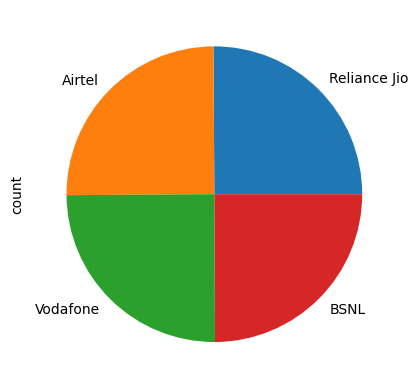

In [15]:
df['telecom_partner'].value_counts().plot(kind='pie')

Bivariate Analysis

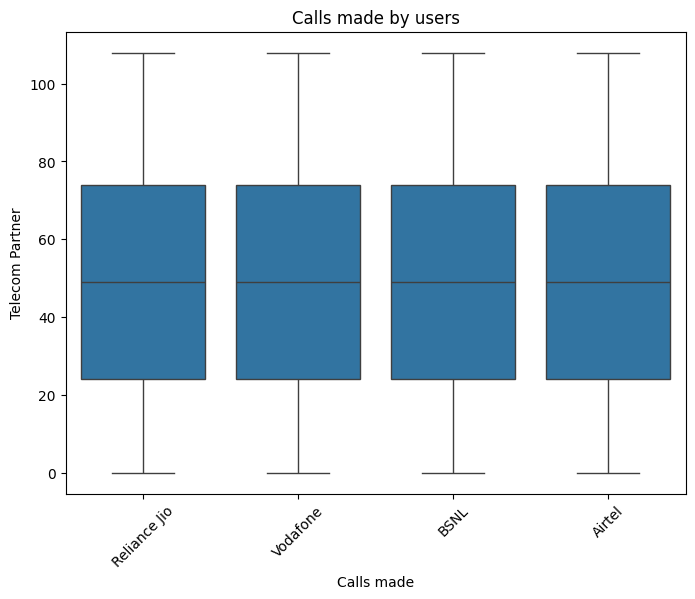

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='telecom_partner', y='calls_made', data=df)
plt.title("Calls made by users")
plt.xlabel('Calls made')
plt.ylabel('Telecom Partner')
plt.xticks(rotation=45)
plt.show()


In [20]:
calls_made = df.groupby('telecom_partner')['calls_made'].mean().sort_values()
print(calls_made)

telecom_partner
Vodafone        48.993668
BSNL            49.250284
Airtel          49.250571
Reliance Jio    49.423229
Name: calls_made, dtype: float64


<Figure size 1000x600 with 0 Axes>

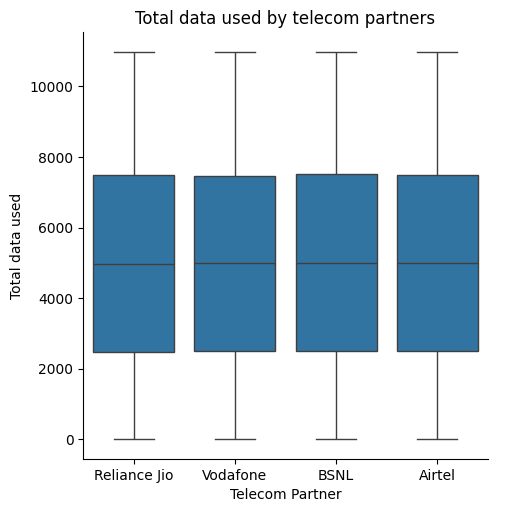

In [22]:
plt.figure(figsize=(10,6))
sns.catplot(x='telecom_partner', y='data_used', data=df, kind='box')
plt.xlabel('Telecom Partner')
plt.ylabel('Total data used')
plt.title("Total data used by telecom partners")
plt.show()

Calculate Monthly Revenue

In [25]:
df['monthly_revenue'] = df['calls_made']+df['sms_sent']+df['data_used']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           243553 non-null  int64         
 1   telecom_partner       243553 non-null  object        
 2   gender                243553 non-null  object        
 3   age                   243553 non-null  int64         
 4   state                 243553 non-null  object        
 5   city                  243553 non-null  object        
 6   pincode               243553 non-null  int64         
 7   date_of_registration  243553 non-null  datetime64[ns]
 8   num_dependents        243553 non-null  int64         
 9   estimated_salary      243553 non-null  int64         
 10  calls_made            243553 non-null  int64         
 11  sms_sent              243553 non-null  int64         
 12  data_used             243553 non-null  int64         
 13 

Customer LifeTime Calculation

In [30]:
from datetime import datetime
today =  datetime.today()

In [32]:
df['customer_tenure_months'] = ((today- df['date_of_registration']).dt.days)//30
# Create CLV column
df['CLV'] = df['monthly_revenue'] * df['customer_tenure_months']

In [34]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,monthly_revenue,customer_tenure_months,CLV
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,0,0,89,62,5518
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0,6074,62,376588
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1,266,62,16492
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1,9482,62,587884
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0,1486,62,92132


In [ ]:
sns.relplot(x = df['telecom_partner'], y=df["monthly_revenue"], kind="line", errorbar=None)
plt.xlabel('Telecom Partner')
plt.ylabel('Monthly Revenue')

In [ ]:
sns.relplot(data=df, x='telecom_partner', y='monthly_revenue', hue='CLV', kind='line')

Saving the Changes

In [57]:
df.to_csv('churn.csv')